In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vincentpssun","key":"d26a8a70aa40ef0a22d3d6e2fd68eab8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

 93% 253M/271M [00:02<00:00, 81.8MB/s]
100% 271M/271M [00:02<00:00, 113MB/s] 
 99% 536M/543M [00:03<00:00, 179MB/s]
100% 543M/543M [00:03<00:00, 152MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 90.6MB/s]


In [6]:
! mkdir DogsVsCats

In [ ]:
! unzip train.zip -d DogsVsCats

In [ ]:
! unzip test1.zip -d DogsVsCats

In [9]:
import os, shutil

train_dir = './DogsVsCats/train/'
test_dir = './DogsVsCats/test1/'
val_dir = './DogsVsCats/val/'
os.mkdir(val_dir)
training_image_length = len(os.listdir(train_dir))
test_image_length = len(os.listdir(test_dir))
print(training_image_length, test_image_length)

25000 12500


In [10]:
cat_train_dir = './DogsVsCats/train/cats'
dog_train_dir = './DogsVsCats/train/dogs'
os.mkdir(cat_train_dir)
os.mkdir(dog_train_dir)
cat_val_dir = './DogsVsCats/val/cats'
dog_val_dir = './DogsVsCats/val/dogs'
os.mkdir(cat_val_dir)
os.mkdir(dog_val_dir)

In [14]:
cat_train_names = ['cat.{}.jpg'.format(i) for i in range(10000) if os.path.isfile(train_dir + 'cat.{}.jpg'.format(i))]
dog_train_names = ['dog.{}.jpg'.format(i) for i in range(10000) if os.path.isfile(train_dir + 'dog.{}.jpg'.format(i))]
len(cat_train_names), len(dog_train_names)

(10000, 10000)

In [16]:
cat_val_names = ['cat.{}.jpg'.format(i) for i in range(10000, len(os.listdir(train_dir))) if os.path.isfile(train_dir + 'cat.{}.jpg'.format(i))]
dog_val_names = ['dog.{}.jpg'.format(i) for i in range(10000, len(os.listdir(train_dir))) if os.path.isfile(train_dir + 'dog.{}.jpg'.format(i))]
len(cat_val_names), len(dog_val_names)

(2500, 2500)

In [17]:
# copy all files in cat_names into the cats training folder
for name in cat_train_names:
  src = os.path.join(train_dir, name)
  dst = os.path.join(cat_train_dir, name)
  shutil.move(src, dst)

for name in dog_train_names:
  src = os.path.join(train_dir, name)
  dst = os.path.join(dog_train_dir, name)
  shutil.move(src, dst)

In [18]:
# copy all files in cat_names into the cats val folder
for name in cat_val_names:
  src = os.path.join(train_dir, name)
  dst = os.path.join(cat_val_dir, name)
  shutil.move(src, dst)

for name in dog_val_names:
  src = os.path.join(train_dir, name)
  dst = os.path.join(dog_val_dir, name)
  shutil.move(src, dst)

In [19]:
for filename in os.listdir(cat_train_dir):
  if 'cat.' in filename:
    newname = filename[4:]
    os.rename(os.path.join(cat_train_dir, filename), os.path.join(cat_train_dir, newname))

for filename in os.listdir(dog_train_dir):
  if 'dog.' in filename:
    newname = filename[4:]
    os.rename(os.path.join(dog_train_dir, filename), os.path.join(dog_train_dir, newname))

for filename in os.listdir(cat_val_dir):
  if 'cat.' in filename:
    newname = filename[4:]
    os.rename(os.path.join(cat_val_dir, filename), os.path.join(cat_val_dir, newname))

for filename in os.listdir(dog_val_dir):
  if 'dog.' in filename:
    newname = filename[4:]
    os.rename(os.path.join(dog_val_dir, filename), os.path.join(dog_val_dir, newname))

In [20]:
len(os.listdir(cat_train_dir)), len(os.listdir(dog_train_dir)), len(os.listdir(cat_val_dir)), len(os.listdir(dog_val_dir))

(10000, 10000, 2500, 2500)

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
os.mkdir(test_dir+'/test')

In [102]:
test_names = ['{}.jpg'.format(i) for i in range(1,len(os.listdir(test_dir)))]
len(test_names)

12500

In [103]:
for name in test_names:
  src = os.path.join(test_dir, name)
  dst = os.path.join(test_dir+'/test', name)
  shutil.move(src, dst)

In [104]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    horizontal_flip=True,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [105]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=64,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    './DogsVsCats/test1',
    target_size=(224,224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
Found 5000 images belonging to 2 classes.


In [71]:
input_dim = (224, 224, 3)
#base_model = tf.keras.applications.ResNet50(
#    include_top=False,
#    weights='imagenet',
#)
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=input_dim
)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [72]:
for layer in base_model.layers:
  layer.trainable = False

In [74]:
"""
#x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
#x = tf.keras.layers.Dropout(0.5)(x)
x = base_model(input)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-4))(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(input, output)
"""
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [75]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [76]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=val_generator,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
313/313 [==============================] - 274s 867ms/step - loss: 0.3714 - accuracy: 0.8272 - val_loss: 0.2312 - val_accuracy: 0.8980
Epoch 2/30
313/313 [==============================] - 271s 865ms/step - loss: 0.1840 - accuracy: 0.9253 - val_loss: 0.1675 - val_accuracy: 0.9346
Epoch 3/30
313/313 [==============================] - 271s 865ms/step - loss: 0.1527 - accuracy: 0.9400 - val_loss: 0.1719 - val_accuracy: 0.9314
Epoch 4/30
313/313 [==============================] - 271s 865ms/step - loss: 0.1465 - accuracy: 0.9430 - val_loss: 0.1740 - val_accuracy: 0.9330
Epoch 5/30
313/313 [==============================] - 271s 865ms/step - loss: 0.1334 - accuracy: 0.9455 - val_loss: 0.1601 - val_accuracy: 0.9368
Epoch 6/30
313/313 [==============================] - 271s 864ms/step - loss: 0.1240 - accuracy: 0.9503 - val_loss: 0.1902 - val_accuracy: 0.9274
Epoch 7/30
313/313 [==============================] - 270s 863ms/step - loss: 0.1176 - accuracy: 0.9523 - val_loss: 0.1690 -

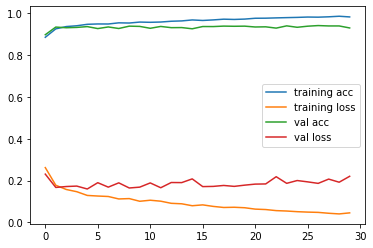

In [77]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
training_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(training_acc, label='training acc')
plt.plot(training_loss, label='training loss')
plt.plot(val_acc, label='val acc')
plt.plot(val_loss, label='val loss')
plt.legend(loc='best')
plt.show()

In [113]:
pred = model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [118]:
pred_new = [1 if p[0] > 0.5 else 0 for p in pred]

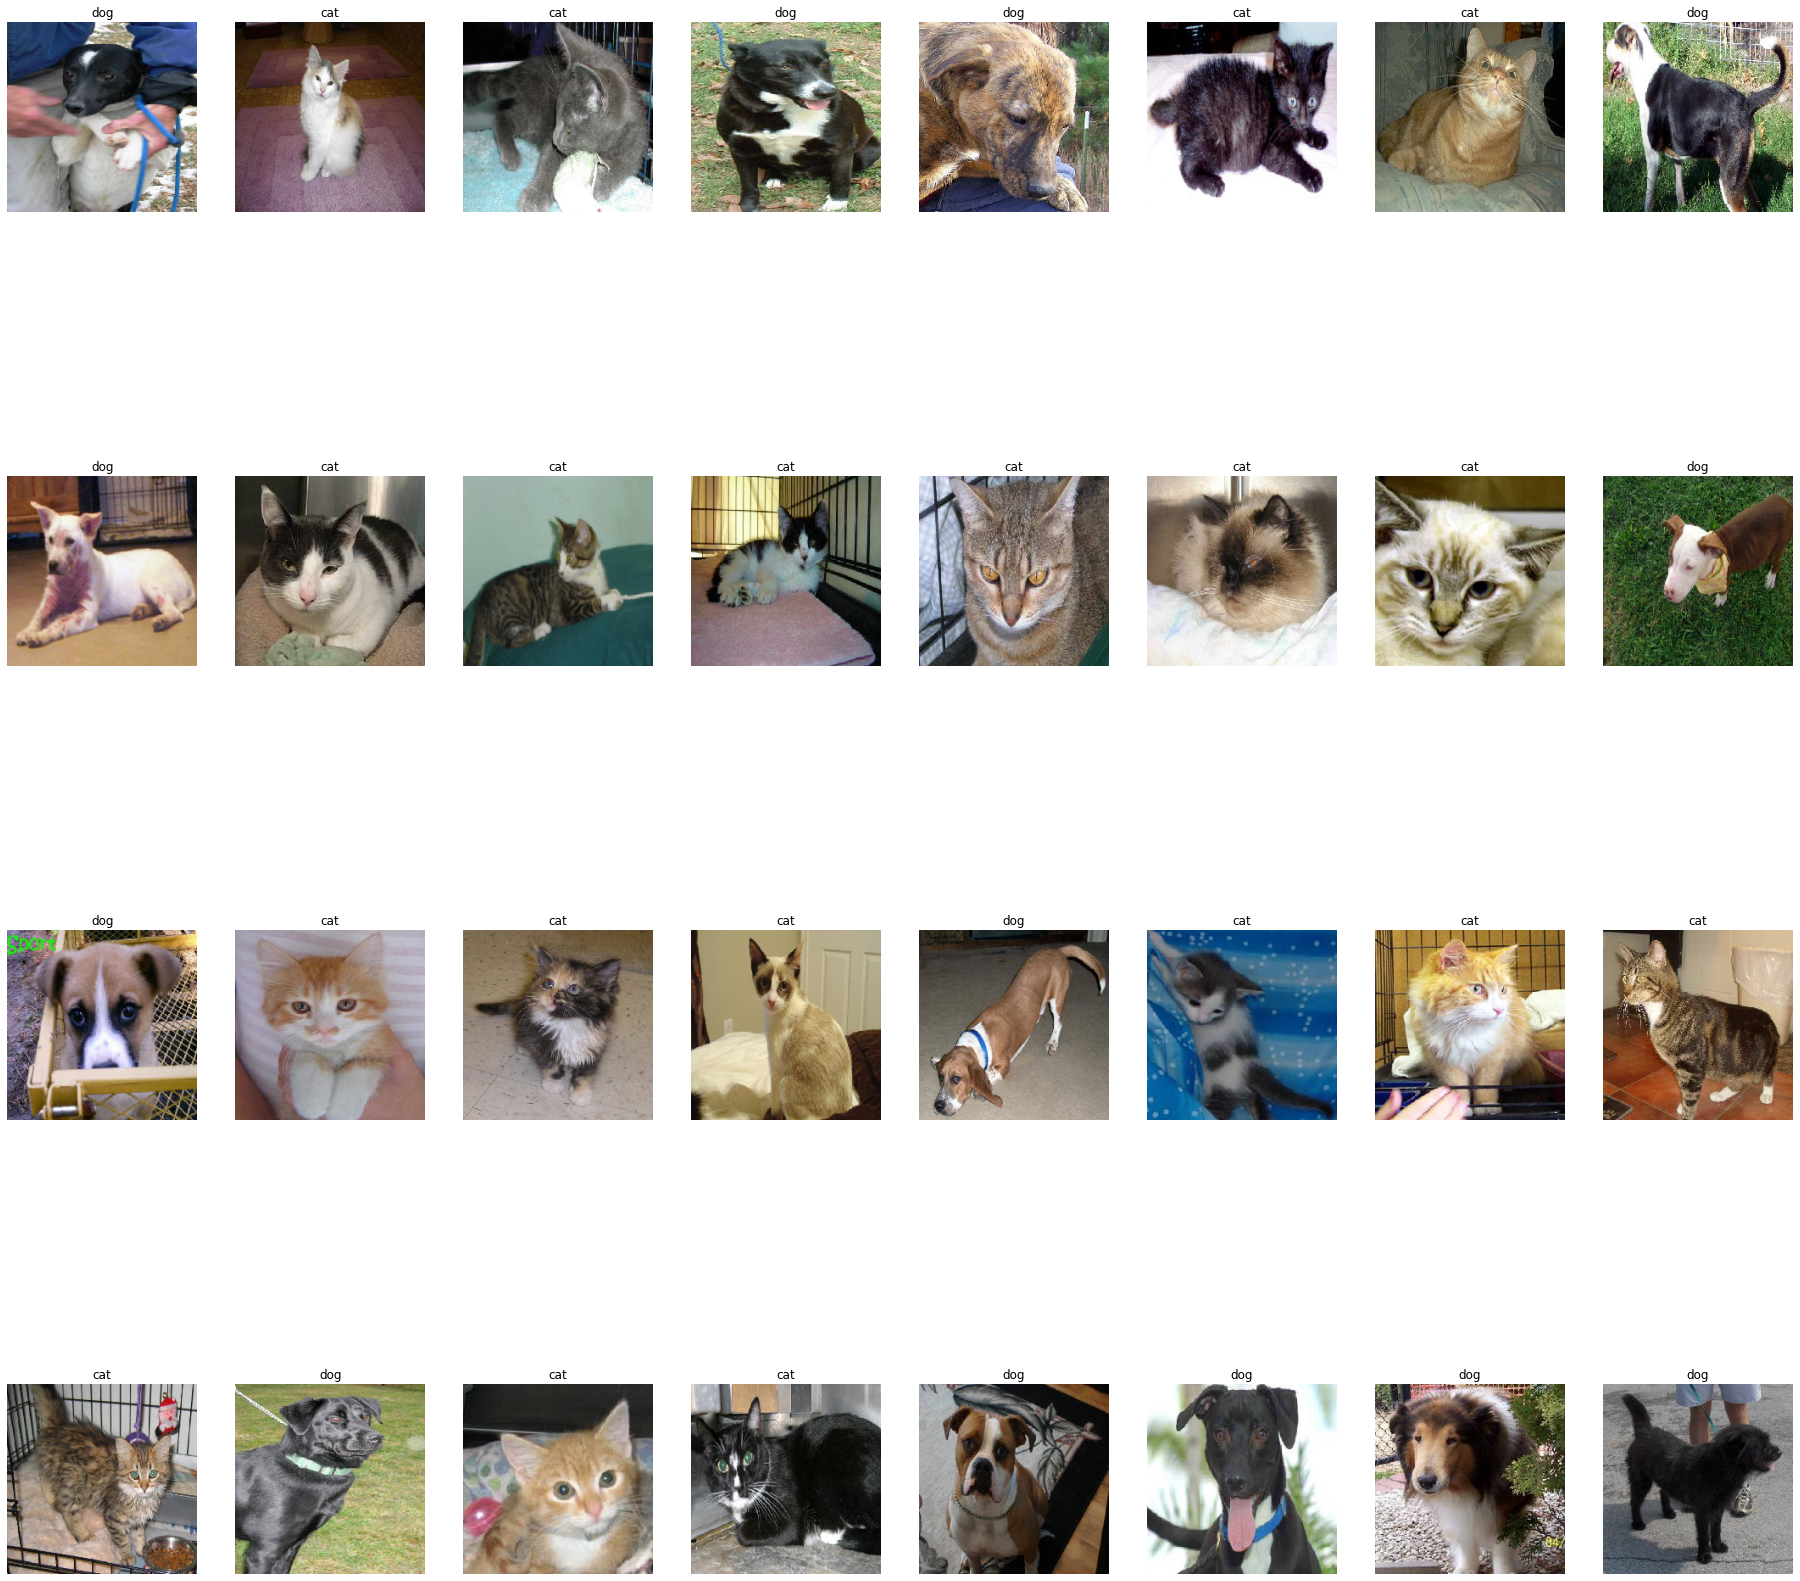

In [122]:
test_generator.reset() # This will make sure we are starting from the beginning
samples = iter(test_generator).next()

fig = plt.figure(figsize=(32,32))
fig.tight_layout()
check = {0:'cat', 1:'dog'}

for num, sample in enumerate(samples[:32]):
  plt.subplot(4,8,num+1)
  plt.title(check[pred_new[num]])
  plt.axis('off')
  plt.imshow(sample)